<a href="https://colab.research.google.com/github/anjanay-anjanay/Big-Data-And-Data-Analytics-For-Managers-Using-Python/blob/main/Project2_FifaOfficial_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# 1.0

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import re

# 1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 1.0.2
from pathlib import Path

In [73]:
# Import warnings module
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")

In [2]:
# 1.1
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 1.2.1 Where is our data:

pathToFolder = "/gdrive/MyDrive/BDDA_Projects"

In [8]:
# 1.2.2 And our file?

path = Path(pathToFolder) / "FIFA22_official_data.csv"

In [9]:
# 2.1 Load the data
data = pd.read_csv(path)

In [10]:
# 2.2
data.shape  #(16710, 65)
data.head()

(16710, 65)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [11]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15198 entries, 0 to 16708
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        15198 non-null  int64  
 1   Name                      15198 non-null  object 
 2   Age                       15198 non-null  int64  
 3   Nationality               15198 non-null  object 
 4   Overall                   15198 non-null  int64  
 5   Potential                 15198 non-null  int64  
 6   Club                      15198 non-null  object 
 7   Value(£)                  15198 non-null  float64
 8   Wage(£)                   15198 non-null  float64
 9   Special                   15198 non-null  int64  
 10  Preferred Foot            15198 non-null  object 
 11  International Reputation  15198 non-null  float64
 12  Weak Foot                 15198 non-null  float64
 13  Skill Moves               15198 non-null  float64
 14  Work R

In [76]:
data.describe().round(2)

,ID,Age,Overall,Potential,Value(£),Wage(£),Special,International Reputation,Weak Foot,Skill Moves,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,Year_Joined,Preferred Foot_encoded,Skill_Performance,Reputation_Performance
count,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,...,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00,15198.00
mean,220043.15,25.84,67.59,72.41,220.78,95.98,1652.49,1.17,3.00,2.47,...,15.59,15.43,15.65,15.85,68.49,45.69,2018.86,0.76,168.62,80.88
std,38190.66,5.09,6.50,5.69,304.65,218.68,258.72,0.48,0.68,0.79,...,16.38,16.04,16.67,17.40,6.30,22.35,2.55,0.43,62.25,42.07
min,27.00,16.00,44.00,46.00,0.00,0.00,754.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,44.00,0.00,1990.00,0.00,47.00,44.00
25%,202969.50,22.00,63.00,68.00,1.90,3.00,1525.00,1.00,3.00,2.00,...,8.00,8.00,8.00,8.00,64.00,27.00,2018.00,1.00,126.00,63.00
50%,228234.00,25.00,68.00,72.00,7.00,7.00,1687.00,1.00,3.00,2.00,...,11.00,11.00,11.00,11.00,68.00,52.00,2020.00,1.00,150.00,68.00
75%,245166.50,30.00,72.00,76.00,450.00,25.00,1827.00,1.00,3.00,3.00,...,14.00,14.00,14.00,14.00,73.00,64.00,2021.00,1.00,210.00,73.00
max,264704.00,54.00,93.00,95.00,975.00,950.00,2341.00,5.00,5.00,5.00,...,92.00,93.00,93.00,90.00,93.00,93.00,2021.00,1.00,455.00,465.00


<Figure size 800x500 with 0 Axes>

<Axes: >

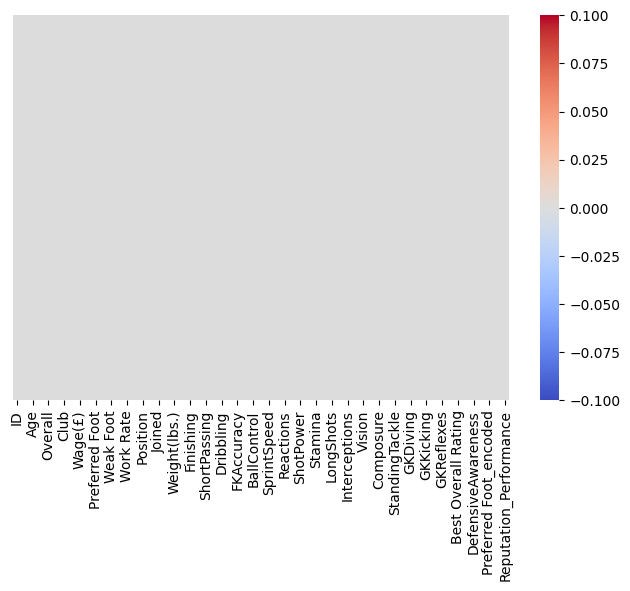

In [78]:
# Heatmap for missing values in training data
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()

<Axes: >

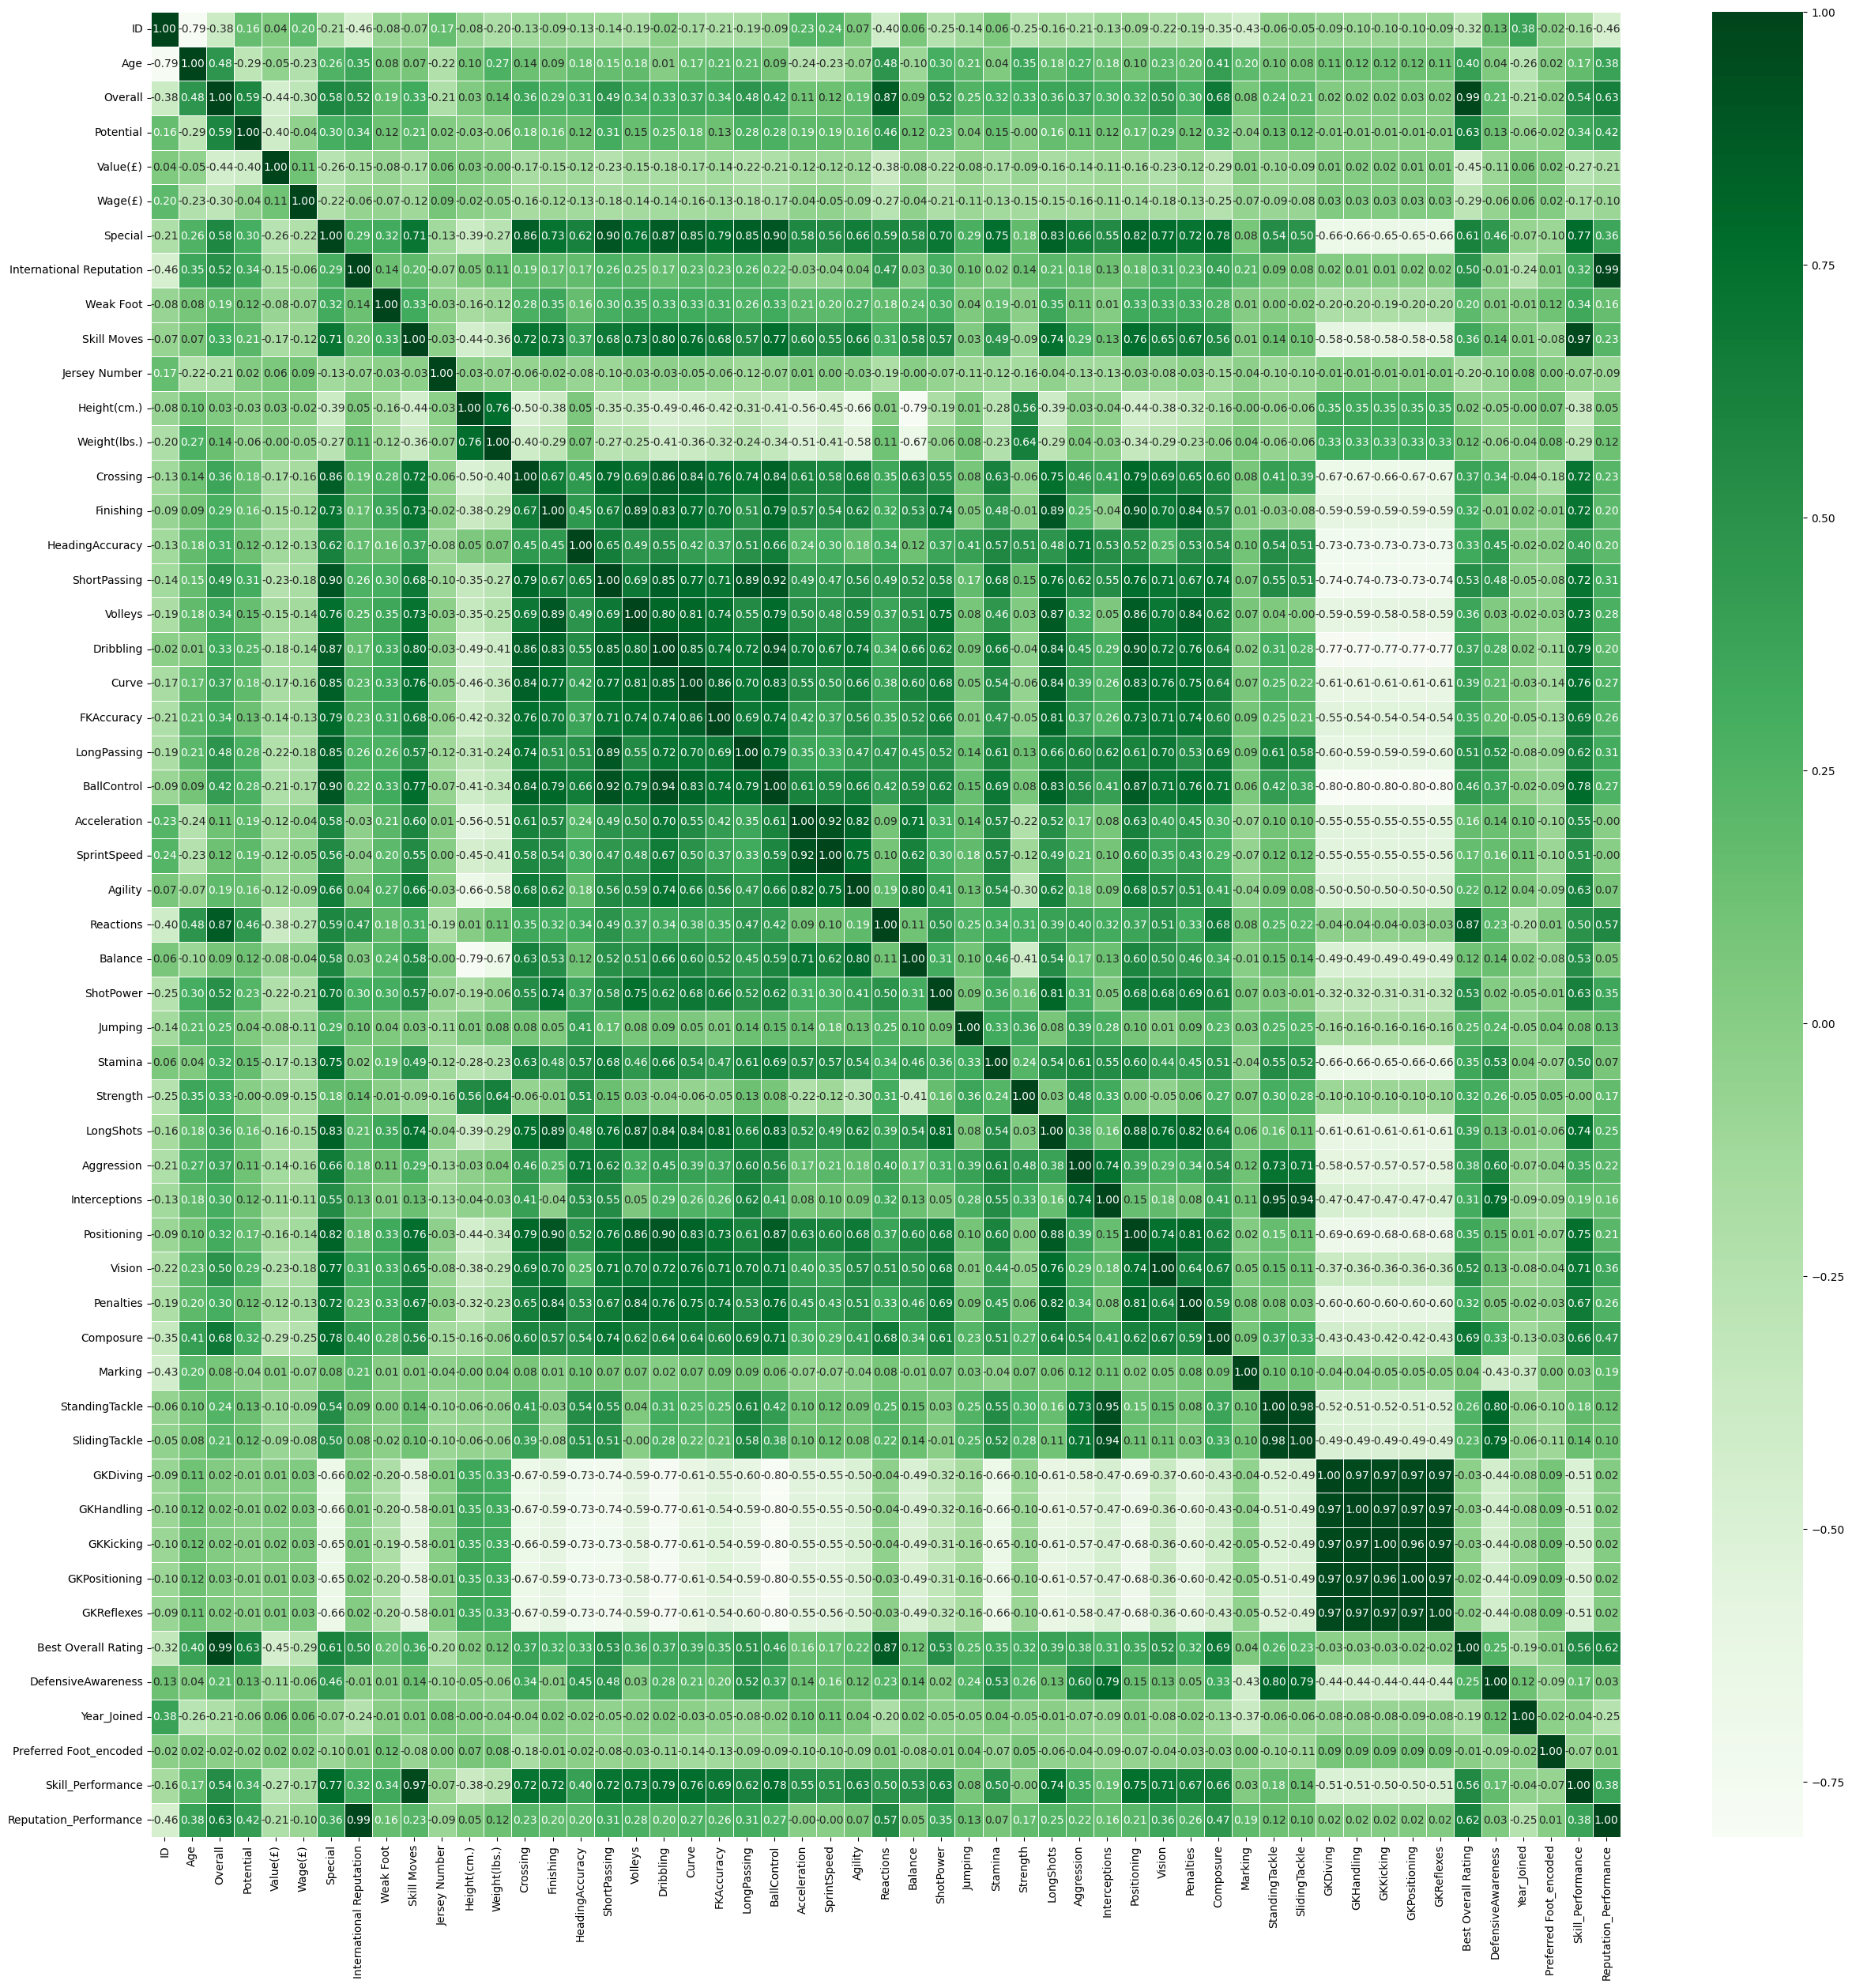

In [87]:
# Correlation
fig, ax = plt.subplots(figsize=(30, 30))  # Increase the figsize
sns.heatmap(data.corr(), annot=True, cmap='Greens', linewidths=.50, fmt='.2f', ax=ax)
plt.show()


In [80]:
# Percentage of data missing
round(data.isnull().mean() * 100,2)

ID                        0.0
Name                      0.0
Age                       0.0
Nationality               0.0
Overall                   0.0
                         ... 
DefensiveAwareness        0.0
Year_Joined               0.0
Preferred Foot_encoded    0.0
Skill_Performance         0.0
Reputation_Performance    0.0
Length: 63, dtype: float64

In [12]:
# Define functions to clean columns
def clean_currency(x):
    if isinstance(x, str):
        return re.sub(r'[^\d.]', '', x)
    return x

def extract_number(x):
    if isinstance(x, str):
        numbers = re.findall(r'\d+', x)
        if numbers:
            return int(numbers[0])
    return x

# Drop unnecessary columns
columns_to_drop = ['Photo', 'Flag', 'Club Logo', 'Loaned From', 'Contract Valid Until', 'Real Face']
data.drop(columns=columns_to_drop, inplace=True)

# Clean special characters from 'Value' and 'Wage' columns
data['Value'] = data['Value'].apply(clean_currency).astype(float)
data['Wage'] = data['Wage'].apply(clean_currency).astype(float)

# Convert height from string to integer
data['Height'] = data['Height'].apply(extract_number).astype(int)

# Convert weight from string to float
data['Weight'] = data['Weight'].apply(extract_number).astype(float)

# Extract year from 'Joined' column
data['Year_Joined'] = pd.to_datetime(data['Joined'], errors='coerce').dt.year


In [13]:
# Rename columns
data.rename(columns={'ID': 'ID', 'Name': 'Name', 'Age': 'Age', 'Nationality': 'Nationality',
                     'Overall': 'Overall', 'Potential': 'Potential', 'Club': 'Club',
                     'Value': 'Value(£)', 'Wage': 'Wage(£)', 'Special': 'Special',
                     'Preferred Foot': 'Preferred Foot', 'International Reputation': 'International Reputation',
                     'Weak Foot': 'Weak Foot', 'Skill Moves': 'Skill Moves', 'Work Rate': 'Work Rate',
                     'Body Type': 'Body Type', 'Position': 'Position', 'Jersey Number': 'Jersey Number',
                     'Height': 'Height(cm.)', 'Weight': 'Weight(lbs.)'}, inplace=True)


In [14]:
data.shape  #(16710, 60)
data.head()

(16710, 60)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value(£),Wage(£),Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year_Joined
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250.0,2341,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2020.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140.0,2314,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2018.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135.0,2307,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2020.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350.0,2304,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2015.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45.0,2292,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2020.0


In [15]:
# Handling Missing Values
missing_values = data.isnull().sum()  # Count missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          264
Value(£)                        0
Wage(£)                         0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      29
Position                       26
Jersey Number                  26
Joined                       1512
Height(cm.)                     0
Weight(lbs.)                    0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                        37
Dribbling                       0
Curve                          37
FKAccuracy                     

In [16]:
# Handling Missing Values

# Fill missing values in 'Club' column with 'Unknown'
data['Club'].fillna('Unknown', inplace=True)

# Fill missing values in 'Body Type', 'Position', 'Jersey Number' columns with appropriate values
data['Body Type'].fillna('Unknown', inplace=True)
data['Position'].fillna('Unknown', inplace=True)
data['Jersey Number'].fillna(0, inplace=True)  # Fill with a default value

# Fill missing values in 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision' columns with median
median_volleys = data['Volleys'].median()
median_curve = data['Curve'].median()
median_agility = data['Agility'].median()
median_balance = data['Balance'].median()
median_jumping = data['Jumping'].median()
median_vision = data['Vision'].median()
data['Volleys'].fillna(median_volleys, inplace=True)
data['Curve'].fillna(median_curve, inplace=True)
data['Agility'].fillna(median_agility, inplace=True)
data['Balance'].fillna(median_balance, inplace=True)
data['Jumping'].fillna(median_jumping, inplace=True)
data['Vision'].fillna(median_vision, inplace=True)

# Fill missing values in 'Interceptions', 'Positioning' columns with 0
data['Interceptions'].fillna(0, inplace=True)
data['Positioning'].fillna(0, inplace=True)

# Fill missing values in 'Composure' column with median
median_composure = data['Composure'].median()
data['Composure'].fillna(median_composure, inplace=True)

# Fill missing values in 'Release Clause' column with 0
data['Release Clause'].fillna(0, inplace=True)

# Fill missing values in 'DefensiveAwareness' column with 0
data['DefensiveAwareness'].fillna(0, inplace=True)

# Remove rows with missing 'Joined' values
data.dropna(subset=['Joined'], inplace=True)

# Mark missing values in 'Marking' column with a placeholder value, e.g., -1
data['Marking'].fillna(-1, inplace=True)


# Display remaining missing values
remaining_missing_values = data.isnull().sum()
print("Remaining Missing Values:\n", remaining_missing_values)



Remaining Missing Values:
 ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value(£)                    0
Wage(£)                     0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Height(cm.)                 0
Weight(lbs.)                0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed  

In [17]:
# Removing Duplicates
duplicate_rows = data.duplicated()
print("Number of Duplicates:", duplicate_rows.sum())
data = data[~duplicate_rows]  # Remove duplicate rows


Number of Duplicates: 0


In [18]:
# Fixing Incorrect Data Types
# Example: Convert 'Jersey Number' to integer and 'Weight(lbs.)' to integer
data['Jersey Number'] = data['Jersey Number'].astype(int)
data['Weight(lbs.)'] = data['Weight(lbs.)'].astype(int)

In [19]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value(£)', 'Wage(£)', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Height(cm.)',
       'Weight(lbs.)', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Year_Joined'],
      dtype='object')


In [20]:
#data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Encoding Categorical Variables
label_encoder = LabelEncoder()
data['Preferred Foot_encoded'] = label_encoder.fit_transform(data['Preferred Foot'])

# Scaling/Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Overall', 'Potential', 'Marking']])

# Feature Engineering
data['Skill_Performance'] = data['Overall'] * data['Skill Moves']
data['Reputation_Performance'] = data['Overall'] * data['International Reputation']

# Final processed data
final_processed_data = pd.DataFrame({
    'Preferred_Foot_encoded': data['Preferred Foot_encoded'],
    'Skill_Performance': data['Skill_Performance'],
    'Reputation_Performance': data['Reputation_Performance']
})



In [21]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value(£),Wage(£),Special,...,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year_Joined,Preferred Foot_encoded,Skill_Performance,Reputation_Performance
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250.0,2341,...,8.0,14.0,CAM,88.0,€206.9M,72.0,2020.0,1,352.0,264.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140.0,2314,...,11.0,9.0,CM,87.0,€160.4M,74.0,2018.0,1,261.0,348.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135.0,2307,...,33.0,37.0,ST,88.0,€91.2M,42.0,2020.0,1,264.0,440.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350.0,2304,...,10.0,13.0,CM,91.0,€232.2M,68.0,2015.0,1,364.0,364.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45.0,2292,...,13.0,14.0,LB,84.0,€77.7M,80.0,2020.0,0,336.0,168.0


In [22]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value(£)', 'Wage(£)', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Height(cm.)',
       'Weight(lbs.)', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded',
       'Skill_Performance', 'Reputation_Performance'],


TASK 1: Performing Supervised Machine Leaning

In [31]:
# Define the columns for ensemble modeling
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier()

# Train individual models
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict on test data using individual models
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Printing the accuracy
print("Ensemble Model Accuracy Using Random Forrest:", rf_accuracy)
print("Ensemble Model Accuracy Using AdaBoost:", ada_accuracy)
print("Ensemble Model Accuracy Using GradientBoosting:", gb_accuracy)

RandomForestClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

Ensemble Model Accuracy Using Random Forrest: 0.80625
Ensemble Model Accuracy Using AdaBoost: 0.7460526315789474
Ensemble Model Accuracy Using GradientBoosting: 0.8


In [32]:
#Another method for calculate accuracy
pred = rf_model.predict(X_test)
(pred == y_test).sum()/len(y_test)

0.80625

Task 2: Performing Unsupervised Learning by Dimensionality Reduction using PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'PCA Clustering')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

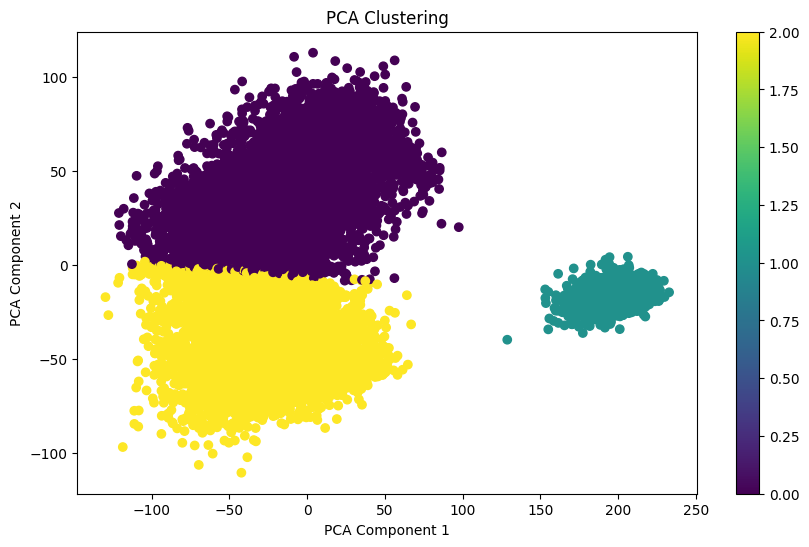

<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance')

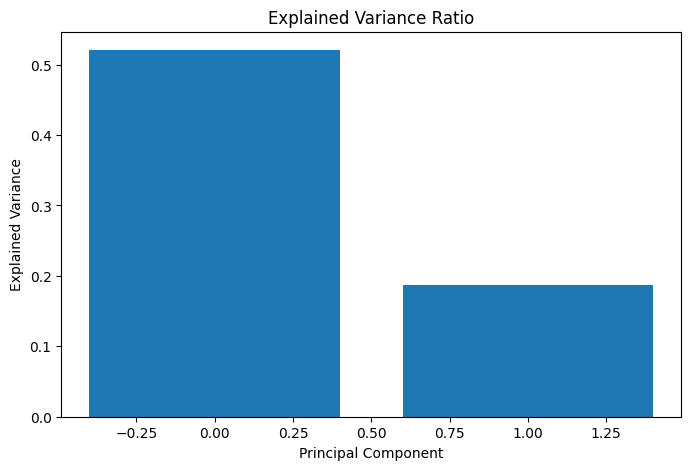

In [26]:
#Define the columns for unsupervised learning
unsupervised_columns = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height(cm.)', 'Weight(lbs.)',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_unsupervised)
X_unsupervised = data[unsupervised_columns]

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_unsupervised)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


# Visualize explained variance ratio
plt.figure(figsize=(8, 5))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


In [57]:
# Print the data type of each column
data.dtypes

ID                          int64
Name                       object
Age                         int64
Nationality                object
Overall                     int64
                           ...   
DefensiveAwareness        float64
Year_Joined               float64
Preferred Foot_encoded      int64
Skill_Performance         float64
Reputation_Performance    float64
Length: 63, dtype: object

Task 3: Building Pipeline using Random Forrest, AdaBoost and Gradient Boost

In [34]:
#Random Forrest with Single Pipeline

# Define columns for supervised learning for single
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']),

    ('scaler', StandardScaler(), ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']),
    ('encoder', OneHotEncoder(), ['Preferred Foot_encoded'])
])

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', rf_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with Random Forrest:", accuracy)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...]),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Preferred '
                                                   'Foot_encoded'])])),
                ('model', RandomForestClassifier())])

Pipeline Accuracy: 0.8055921052631579


In [37]:
#AdaBoost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])

# Create an AdaBoostClassifier model
ada_model = AdaBoostClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', ada_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with AdaBoost:", accuracy)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...])])),
                ('model', AdaBoostClassifier())])

Pipeline Accuracy with AdaBoost: 0.7460526315789474


In [40]:
#Gradient Boost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])

# Create an GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', gb_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with GradientBoost:", accuracy)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...])])),
                ('model', GradientBoostingClassifier())])

Pipeline Accuracy with GradientBoost: 0.8


TASK 4: Finding top 10 most important features of our dataset to determine the skill moves

RandomForestClassifier()

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x79ea794a7d60>,
 [Text(0, 0, 'Dribbling'),
  Text(1, 0, 'Positioning'),
  Text(2, 0, 'BallControl'),
  Text(3, 0, 'Curve'),
  Text(4, 0, 'GKReflexes'),
  Text(5, 0, 'Finishing'),
  Text(6, 0, 'Volleys'),
  Text(7, 0, 'Crossing'),
  Text(8, 0, 'Agility'),
  Text(9, 0, 'GKDiving')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

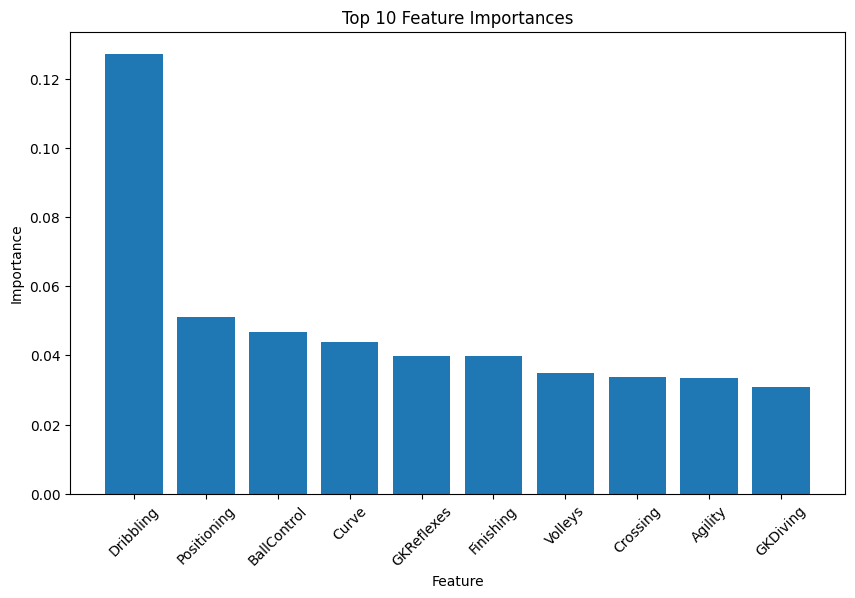

In [38]:
#Importance of Feature Selection using Random Forrest

# Define the columns for feature importance
feature_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_features) and target (y_features)
X_features = data[feature_columns]
y_features = data['Skill Moves']

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model on the entire dataset
rf_model.fit(X_features, y_features)

# Get feature importances
importances = rf_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()


TASK 5: Perform Bagging with Random Forrest and Gradient boosting and AdaBoost

In [41]:
#Bagging Classifier operation
# Randomly select 1000 rows from the dataset
#subset_data = data.sample(n=1000, random_state=42)


# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
rf_model = RandomForestClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_rf_model = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_rf_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8065789473684211


In [44]:
#Bagging with Gradient Boosting classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
gb_model = GradientBoostingClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_gb_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_gb_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8049342105263158


In [49]:
#Bagging with AdaBoost classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
ada_model = AdaBoostClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_ada_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_ada_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_ada_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8049342105263158


Task 6: Finding Mean Square Error using DecisionTreeClassifier

In [93]:
# 3.0 A function to model and calculate MAE
#with MAX Depth
def get_mae(max_depth,X_train, val_X, y_train, val_y):
    # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return mae

In [94]:
# 3.1 Compare MAE with differing values of max_depth
for max_depth in [1, 2, 3, 4, 5]:
    my_mae = get_mae(max_depth, X_train, X_test, y_train, y_test)
    print(f"Max depth: {max_depth} \t\t Mean Absolute Error: {my_mae}")

Max depth: 1 		 Mean Absolute Error: 0.41511995457821754
Max depth: 2 		 Mean Absolute Error: 0.3459537169061179
Max depth: 3 		 Mean Absolute Error: 0.3023816176467851
Max depth: 4 		 Mean Absolute Error: 0.28672975554531216
Max depth: 5 		 Mean Absolute Error: 0.28336475212849016


In [95]:
# 3.0 A function to model and also to calculate MAE
#WITH MAX LEAF
def get_mae(max_leaf_nodes, X_train, val_X, y_train, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)

In [96]:
# 3.1 Compare MAE with differing values of max_leaf_nodes:
#  Get

for max_leaf_nodes in [100, 2000, 6000, 14000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")

Max leaf nodes: 100 		 Mean Absolute Error: 0.2691251133971366
Max leaf nodes: 2000 		 Mean Absolute Error: 0.29901315789473687
Max leaf nodes: 6000 		 Mean Absolute Error: 0.29901315789473687
Max leaf nodes: 14000 		 Mean Absolute Error: 0.29901315789473687


Task 7: Performing XGBoost operations

In [100]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Fit the XGBoost Regressor on training data
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate mean squared error for XGBoost regression
mse = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regressor Mean Squared Error:", mse)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBoost Regressor Mean Squared Error: 0.1707279150202635


In [101]:
#XGBoost Example
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the XGBoost Classifier on training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

XGBoost Classifier Accuracy: 0.7963815789473684


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x79ea4e00b010>,
 [Text(0, 0, 'GKDiving'),
  Text(1, 0, 'Dribbling'),
  Text(2, 0, 'Finishing'),
  Text(3, 0, 'GKHandling'),
  Text(4, 0, 'Positioning'),
  Text(5, 0, 'SlidingTackle'),
  Text(6, 0, 'Agility'),
  Text(7, 0, 'Volleys'),
  Text(8, 0, 'Potential'),
  Text(9, 0, 'Curve')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

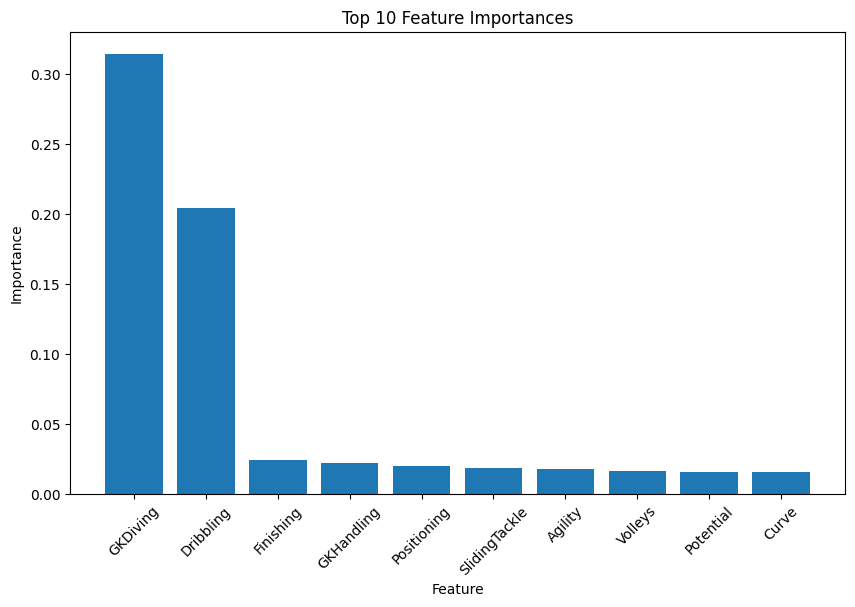

In [102]:
# Get feature importances
importances = xgb_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()